# IMPORT LIBRARY

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# MEMBACA GAMBAR

In [52]:
image = cv2.imread("baguskrisnaUTS.jpg")

In [53]:
image.shape

(2581, 3680, 3)

In [54]:
[baris,kolom]= image.shape[:2]

# MENGKONVERSI GAMBAR KE RGB

In [55]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

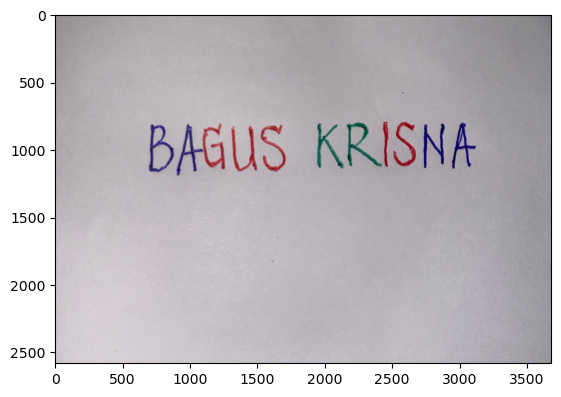

In [56]:
plt.imshow(image)

# MENINGKATKAN KECERAHAN DAN KONTRAS

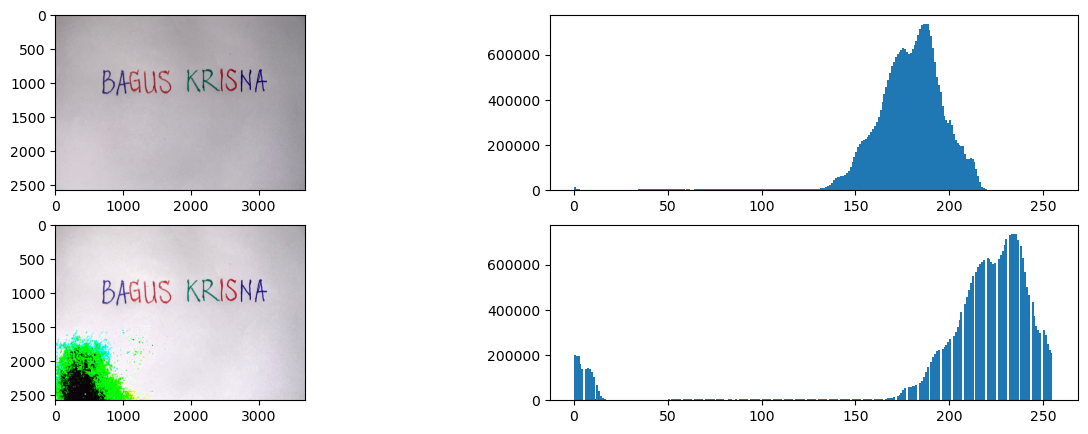

In [57]:
alpa = 1.2
beta = 10

citragabungan= np.zeros((baris,kolom,3))

for x in range (baris) :
    for y in range (kolom) :
        gcx = (image[x, y] * alpa) + beta
        citragabungan[x, y] = gcx

citragabungan = citragabungan.astype(np.uint8)

fig, axs = plt.subplots(2, 2, figsize = (15,5))
axs[0, 0].imshow(image)
axs[0, 1].hist(image.ravel(), 256, [0, 256])
axs[1, 0].imshow(citragabungan)
axs[1, 1].hist(citragabungan.ravel(), 256, [0,256])
plt.show()

# MENDETEKSI WARNA

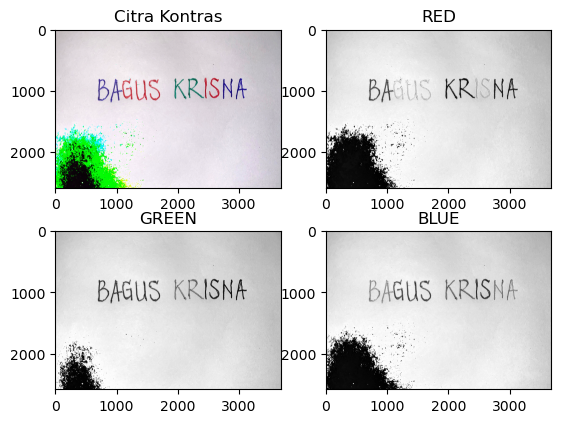

In [58]:
plt.subplot(2, 2, 1)
plt.imshow(citragabungan)
plt.title('Citra Kontras')

# mendeteksi warna merah
plt.subplot(2, 2, 2)
plt.imshow(citragabungan[:,:,0], cmap="gray")
plt.title('RED')

# mendeteksi warna hijau
plt.subplot(2, 2, 3)
plt.imshow(citragabungan[:,:,1], cmap="gray")
plt.title('GREEN')

# mendeteksi warna merah
plt.subplot(2, 2, 4)
plt.imshow(citragabungan[:,:,2], cmap="gray")
plt.title('BLUE')

plt.show()

# MENAMPILKAN HISTOGRAM

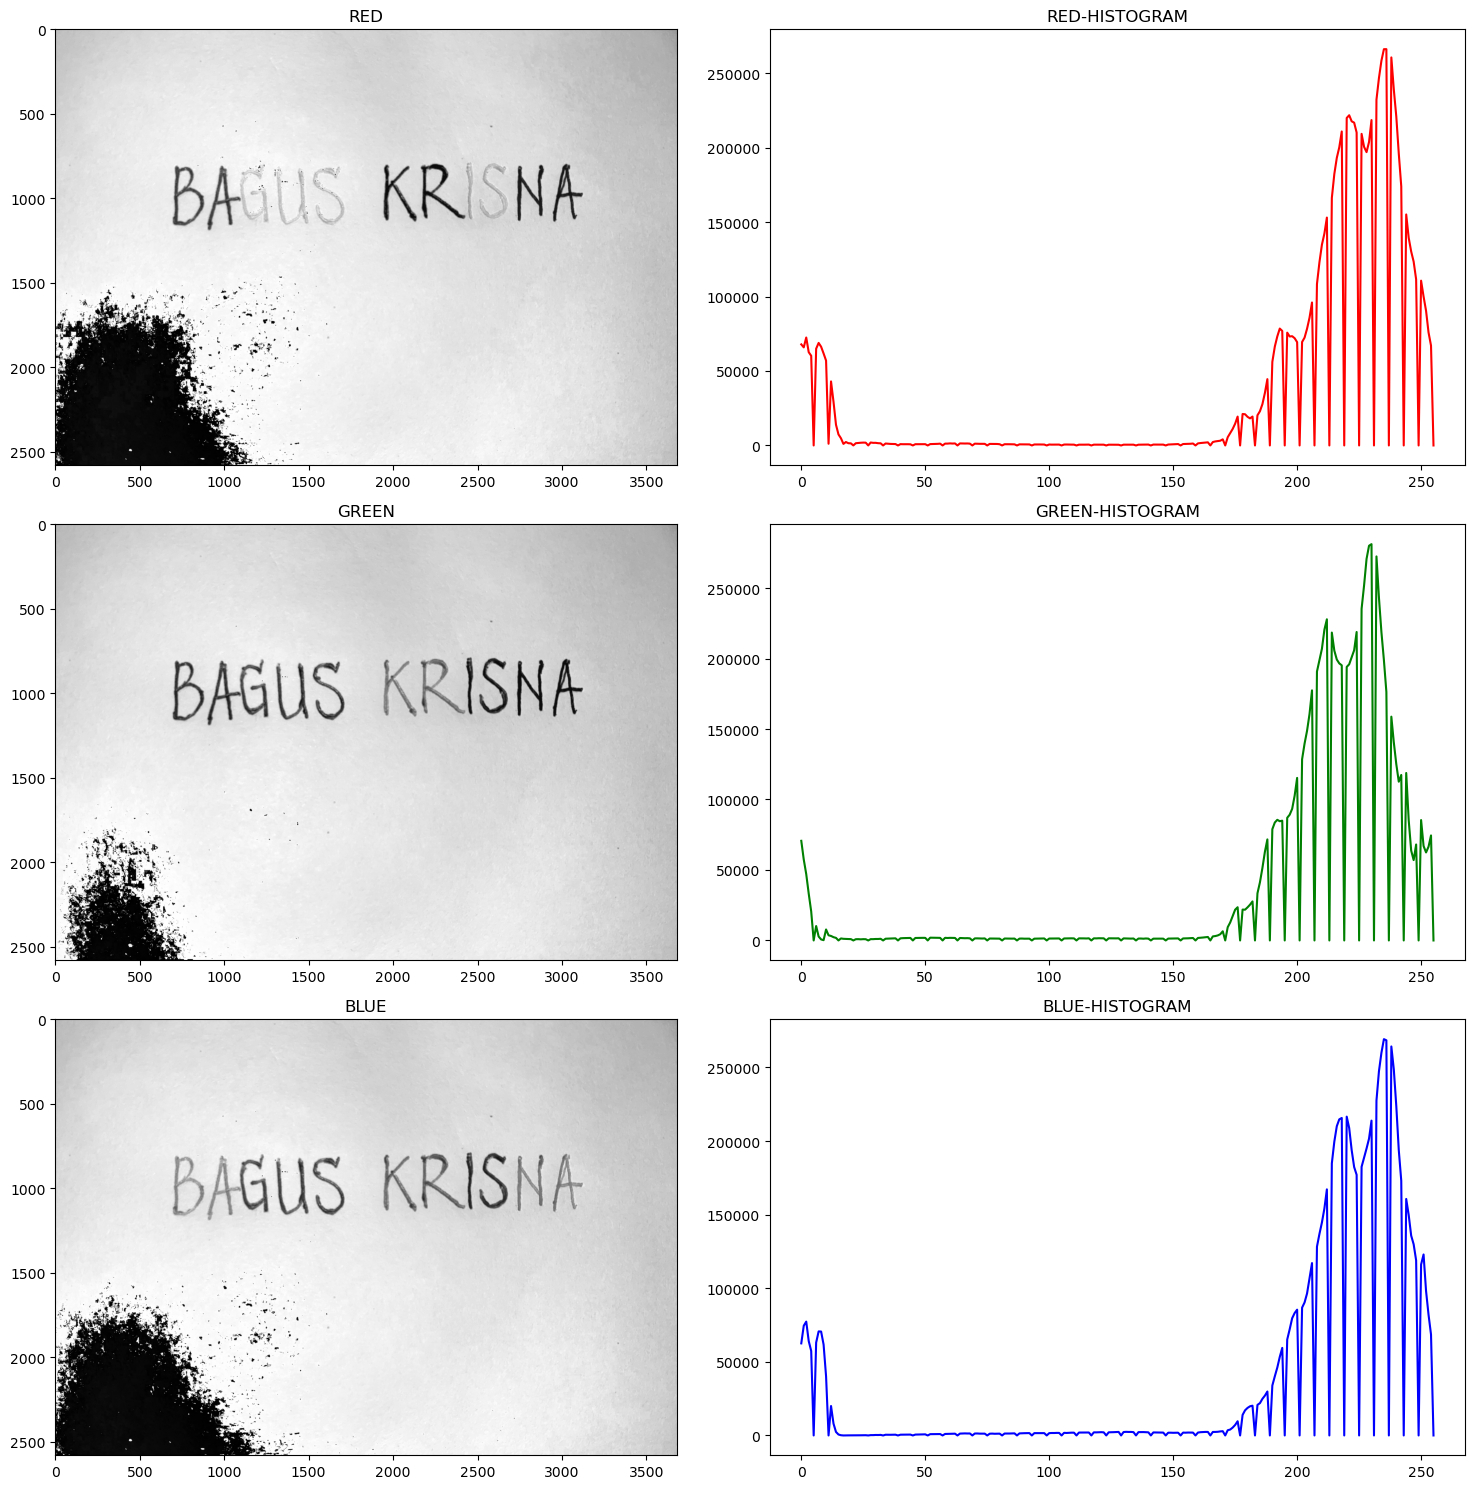

In [59]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# warna merah
merah = citragabungan[:, :, 0]
histmerah = cv2.calcHist([merah], [0], None, [256], [0,256])
axs[0, 0].imshow(merah, cmap='gray')
axs[0, 0].set_title('RED')
axs[0, 1].plot(histmerah, color='r')
axs[0, 1].set_title('RED-HISTOGRAM')

# warna hijau
hijau = citragabungan[:, :, 1]
histhijau = cv2.calcHist([hijau], [0], None, [256], [0,256])
axs[1, 0].imshow(hijau, cmap='gray')
axs[1, 0].set_title('GREEN')
axs[1, 1].plot(histhijau, color='g')
axs[1, 1].set_title('GREEN-HISTOGRAM')

# warna biru
biru = citragabungan[:, :, 2]
histbiru = cv2.calcHist([biru], [0], None, [256], [0,256])
axs[2, 0].imshow(biru, cmap='gray')
axs[2, 0].set_title('BLUE')
axs[2, 1].plot(histbiru, color='b')
axs[2, 1].set_title('BLUE-HISTOGRAM')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'RED-GREEN-BLUE')

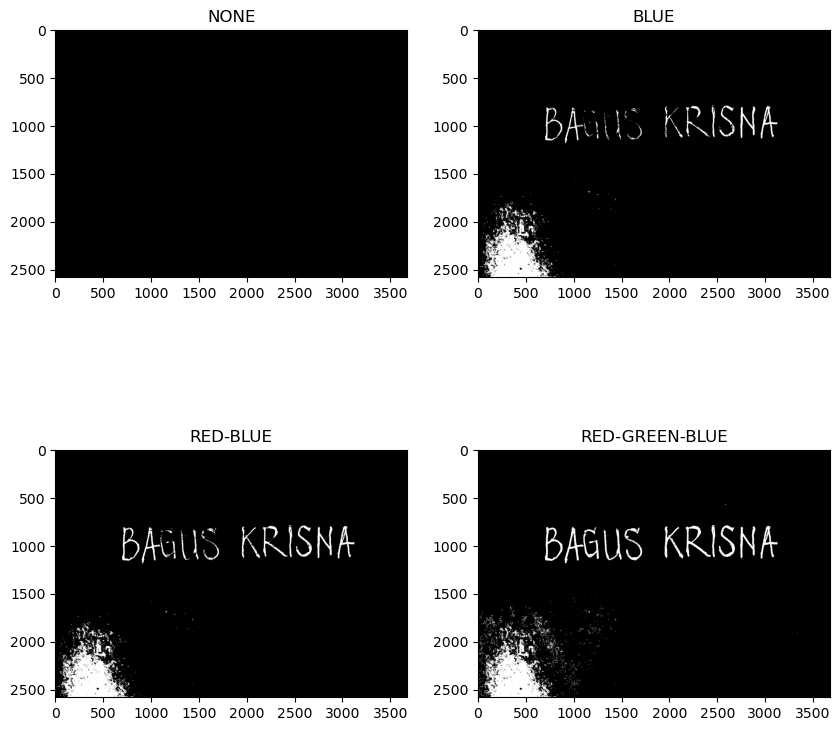

In [65]:
gray = cv2.cvtColor(citragabungan, cv2.COLOR_RGB2GRAY)
fig, axs = plt.subplots (2, 2, figsize=(10,10))

(thresh, binary1) = cv2.threshold(gray, 0, 0, cv2.THRESH_BINARY)
axs[0,0].imshow(binary1, cmap = 'gray')
axs[0,0].set_title('NONE')

(thresh, binary2) = cv2.threshold(gray, 99,255, cv2.THRESH_BINARY)
axs[0,1].imshow(binary2, cmap = 'binary')
axs[0,1].set_title('BLUE')

(thresh, binary3) = cv2.threshold(gray, 116, 255, cv2.THRESH_BINARY)
axs[1,0].imshow(binary3, cmap = 'binary')
axs[1,0].set_title('RED-BLUE')

(thresh, binary4) = cv2.threshold(gray, 145, 255, cv2.THRESH_BINARY)
axs[1,1].imshow(binary4, cmap = 'binary')
axs[1,1].set_title('RED-GREEN-BLUE')

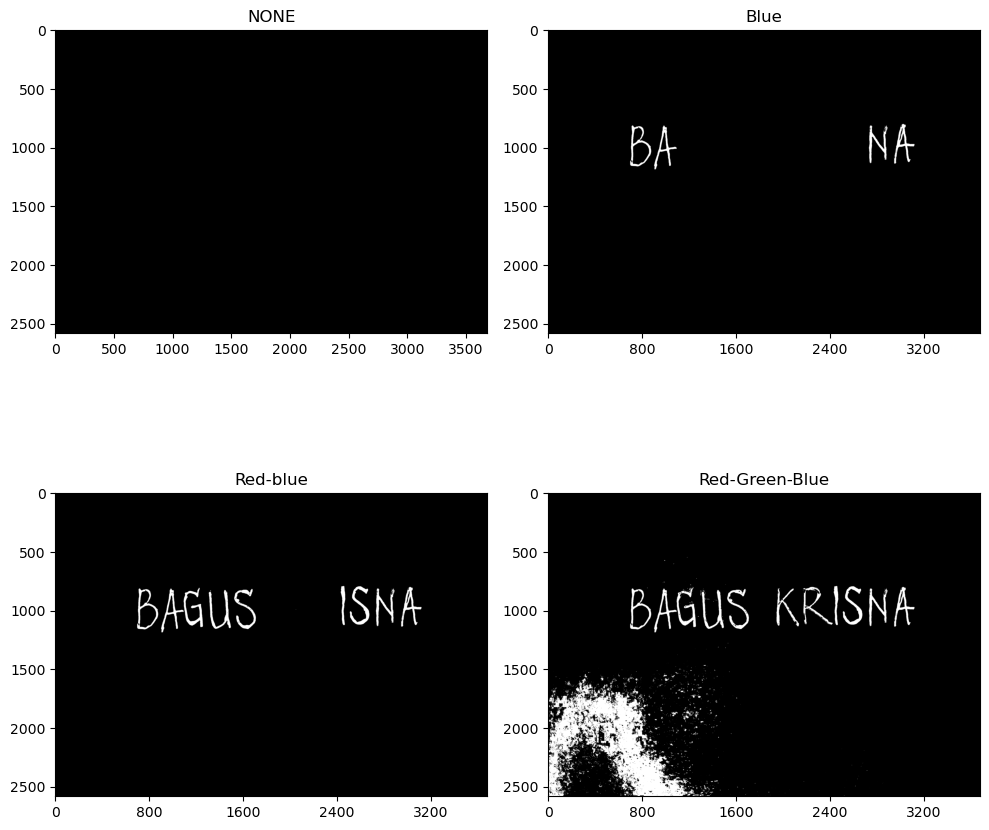

In [68]:
# Konversi citra ke dalam ruang warna HSV
hsv_image = cv2.cvtColor(citragabungan, cv2.COLOR_RGB2HSV)

# Definisikan rentang warna untuk setiap warna
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([140, 255, 255])

# Gunakan ambang batas untuk warna hijau yang telah Anda temukan
lower_green = np.array([20, 100, 100])
upper_green = np.array([250, 255, 255])

lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Deteksi warna biru
mask_blue = cv2.inRange(hsv_image, lower_blue, upper_blue)
# Deteksi warna hijau
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)
# Deteksi warna merah
mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

# Plot hasil

#gambar 1
gray = cv2.cvtColor(citragabungan, cv2.COLOR_RGB2GRAY)
fig, axs = plt.subplots (2, 2, figsize=(10,10))

(thresh, binary1) = cv2.threshold(gray, 0, 0, cv2.THRESH_BINARY)
axs[0,0].imshow(binary1, cmap = 'gray')
axs[0,0].set_title('NONE')

#gambar 2
plt.subplot(2, 2, 2)
plt.imshow(mask_blue, cmap='gray')
plt.title('Blue')
plt.xticks(np.arange(0, mask_blue.shape[1]+1, 800))
plt.yticks(np.arange(0, mask_blue.shape[0]+1, 500))
plt.axis('on')

#gambar 3
plt.subplot(2, 2, 3)
plt.imshow(np.maximum(mask_red, mask_blue), cmap='gray')
plt.title('Red-blue')
plt.xticks(np.arange(0, mask_green.shape[1], 800))
plt.yticks(np.arange(0, mask_green.shape[0], 500))
plt.axis('on')

#gambar 4
plt.subplot(2, 2, 4)
plt.imshow(mask_green, cmap='gray')
plt.title('Red-Green-Blue')
plt.xticks(np.arange(0, mask_green.shape[1], 800))
plt.yticks(np.arange(0, mask_green.shape[0], 500))
plt.axis('on')

#menampilkan output
plt.tight_layout()
plt.show()
